## Diabetes Prediction

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score  , classification_report
import seaborn as sns

In [45]:
df = pd.read_csv("C:/Users/RAJEEV PRAJAPAT/Desktop/python/project_Logistic_regreisson/dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
## we see that they is same value are ZERO like BMI , BP or other but in the real world case they can not be zero ,so we try to fill them.
df['BMI'] = df['BMI'].replace(0 , df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0 , df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0 , df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0 , df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0 , df['Insulin'].mean())

In [48]:
df.isnull().sum()
## no null values are present in the dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<Axes: >

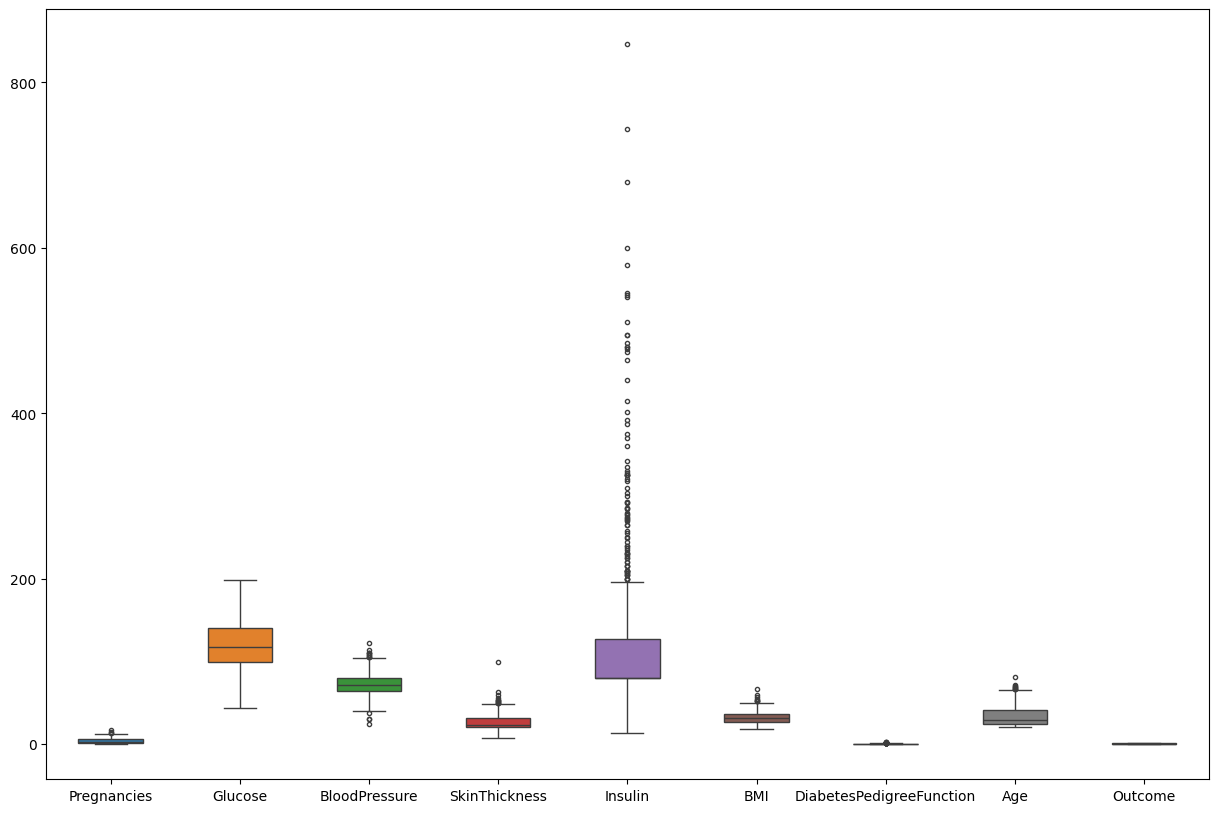

In [50]:
fig , ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df , width=0.5 , ax=ax ,fliersize=3)

In [51]:
##Sparate in inpedendent and dependent
X = df.drop(['Outcome'] , axis=1)
y = df['Outcome']

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25, random_state=0)

In [53]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [54]:
import pickle
from sklearn.preprocessing import StandardScaler

# Standard scaling - Standardization
def scaler_standard(X_train, X_test):
    # Initialize the scaler
    scaler = StandardScaler()
    
    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform the test data
    X_test_scaled = scaler.transform(X_test)
    
    # Save the scaler model to a pickle file
    try:
        with open('C:/Users/RAJEEV PRAJAPAT/Desktop/python/project_Logistic_regreisson/model/standerScaler.pkl', 'wb') as f:
            pickle.dump(scaler, f)
        print("Pickle file 'standerScaler.pkl' has been successfully created.")
    except Exception as e:
        print(f"An error occurred while saving the pickle file: {e}")
    
    return X_train_scaled, X_test_scaled


In [55]:
X_train_scaled, X_test_scaled = scaler_standard(X_train , X_test)

Pickle file 'standerScaler.pkl' has been successfully created.


In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled , y_train)

LogisticRegression()

In [57]:
## hyper parmaeter tunning
## grid serachCVg'
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
parameters = {
    'penalty' : ['l1' ,'l2'] , 
    'C' :np.logspace(-3,3,7),
    'solver' :['newton-cg' , 'lbfgs' , 'liblinear'],
}

In [58]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,               ## model
                   param_grid=parameters ## hyperparameter
                   ,scoring='accuracy'   ## meterics of scoring
                   , cv=10)               ## numbers of folds

clf.fit(X_train_scaled , y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [59]:
clf.best_params_

{'C': np.float64(1.0), 'penalty': 'l2', 'solver': 'liblinear'}

In [60]:
clf.best_score_

np.float64(0.763793103448276)

In [61]:
y_pred = clf.predict(X_test_scaled)

In [62]:
conf_mat = confusion_matrix(y_test , y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [63]:
Tp = conf_mat[0][0]
Fp = conf_mat[0][1]
Fn = conf_mat[1][0]
Tn = conf_mat[1][1]

In [64]:
Accuracy = (Tp+Tn) / (Tp+Fp+Fn+Tn)
Accuracy

np.float64(0.796875)

In [65]:
Precision  = Tp/(Tp+Fp)
Precision

np.float64(0.9)

In [66]:
Recall = Tp/(Tp+Fn)
Recall

np.float64(0.8181818181818182)

In [67]:
F1 = 2*(Recall*Precision)/(Recall+Precision)
F1

np.float64(0.8571428571428572)

In [68]:
import pickle
File = open('C:/Users/RAJEEV PRAJAPAT/Desktop/python/project_Logistic_regreisson/model/modelForPrediction.pkl' , 'wb')
pickle.dump(log_reg,File)
